In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression

In [57]:
X_train = pd.read_csv('./X_train.csv')
X_test = pd.read_csv('./X_test.csv')
y_train = pd.read_csv('./y_train.csv')
y_test = pd.read_csv('./y_test.csv')

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(X_test.head(5))
print(y_test.head(5))

(800, 11)
(400, 11)
(800, 1)
(400, 1)
   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  GrLivArea  \
0    11851            7            5       1990          1990       1442   
1     9920            7            5       1996          1997       2013   
2    11216            8            5       2006          2006       1489   
3     8244            7            5       2004          2004       1720   
4    11787            7            5       1996          1997       2398   

   FullBath  BedroomAbvGr  KitchenAbvGr  YrSold  const  
0         2             3             1    2009      1  
1         2             3             1    2007      1  
2         2             3             1    2006      1  
3         2             3             1    2007      1  
4         2             3             1    2007      1  
   label
0      1
1      1
2      1
3      1
4      1


In [58]:
def LogisticRegressionScikit(X_train, y_train, X_test, y_test):
    """
    Computes logistic regression with scikit-learn.
    
    Args:
        X_train: feature matrix of training set
        y_train: truth value of training set
        X_test: feature matrix of test set
        y_test: truth value of test set

    Returns:  
        w: numpy array of learned coefficients
        y_pred: numpy array of predicted labels for the test data
        score: accuracy of test data
    """

    clf = LogisticRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return clf.coef_, y_pred, accuracy_score(y_test, y_pred)


In [59]:

coef_scikit, y_pred_scikit, acc_scikit = LogisticRegressionScikit(X_train, y_train, X_test, y_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(acc_scikit))
print('logistic regression coefficient:', coef_scikit)

Accuracy of logistic regression classifier on test set: 0.95
logistic regression coefficient: [[ 3.21508185e-04  1.94396864e+00  1.02890178e+00  7.66500286e-02
   1.38413668e-03  7.19273298e-03  2.57189704e-01 -9.41121551e-01
  -4.61565913e-01 -9.09786113e-02 -2.21951087e-04]]


In [60]:
def sigmoid_activation(x):
    """
    Calculates the sigmoid function.
    
    Args:
        x: numpy array of input
        
    Returns:
        final_result: numpy array of sigmoid result
    """
    final_result = 1 / (1 + np.exp(-x))
    return final_result

In [61]:
def model_optimize(w, X, Y):
    """
    Calculates gradient of the weights.
    
    Args:
        X: numpy array of training samples
        Y: numpy array of training labels
        w: numpy array of weights
    Returns:
        dw: the gradient of the weights

    """
    s = sigmoid_activation(np.dot(w, X.T)) 
    dw = (1 / X.shape[0]) * np.dot(X.T, (s - Y.T).T)
    return dw.T

In [62]:
def LogisticRegressionSGD(w, X, Y, learning_rate, num_iterations):
    """
    Uses SGD to update weights for logistic regression.
    
    Args:       
        w: numpy array of initial weights
        X: numpy array of training samples
        Y: numpy array of training labels
        learning_rate: float learning rate to update w
        num_iterations: int number of iterations to update w
    
    Returns:  
        coeff: numpy array of weights after optimization
        accuracies: a list of accuracy at each hundred's iteration. With 2000 iterations, 
                    accuracies should be a list of size 20 
    """
    accuracies = []
    w = np.array(w)
    m = Y.shape[0]
    for i in range(num_iterations + 1):
        dw = model_optimize(w, X, Y)
        w -= learning_rate * dw
        if i % 100 == 0:
            y_pred = predict(sigmoid_activation(np.dot(w, X.T)), m)
            accuracies.append(accuracy_score(Y, y_pred.T))
    coeff = w
    return coeff, accuracies

In [63]:
def LogisticRegressionAda(w, X, Y, learning_rate, num_iterations):
    """
    Use AdaGrad to update weights.
    
    Args:       
        w: numpy array of initial weights
        X: numpy array of training samples
        Y: numpy array of training labels
        learning_rate: float learning rate to update w
        num_iterations: int number of iterations to update w
    
    Returns:   
        coeff: numpy array of weights after optimization
        accuracies: a list of accuracy at each hundred's iteration
    """
    accuracies = []
    w = np.array(w)
    m = Y.shape[0]
    moment = np.zeros(w.shape)
    for i in range(num_iterations + 1):
        dw = model_optimize(w, X, Y)
        moment += dw ** 2
        w -= learning_rate * dw / (np.sqrt(moment) + 0.01)
        if i % 100 == 0:
            h = np.dot(w, X.T)
            y_pred = predict(sigmoid_activation(h), m)
            accuracies.append(accuracy_score(Y, y_pred.T))
    coeff = w
    return coeff, accuracies

In [64]:
def predict(final_pred, m):
    """
    Predict labels from probability to 0/1 label, threshold 0.5.
    
    Args:
        final_pred: m x 1 vector, probabilty of each sample belonging to class 1
        m: number of samples
        
    Returns:
        y_pred: m x 1 vector, label of each sample, can be 0/1
    """
    y_pred = np.array([1 if i >= 0.5 else 0 for i in final_pred[0]])
    y_pred.reshape(1, m)
    return y_pred

In [65]:

# Do some data preparation, convert dataframe to numpy array
n_features = X_train.shape[1]

w = np.zeros((1, n_features))

X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

m_train =  X_train.shape[0]
m_test =  X_test.shape[0]


In [66]:

#Gradient Descent
coeff_SGD, acc_SGD = LogisticRegressionSGD(w, X_train, y_train, learning_rate=0.0001,num_iterations=2000)

# TODO: predict probability
final_train_pred_SGD = sigmoid_activation(np.dot(coeff_SGD, X_train.T))
final_test_pred_SGD = sigmoid_activation(np.dot(coeff_SGD, X_test.T))
# predict label
y_train_pred_SGD = predict(final_train_pred_SGD, m_train)
y_test_pred_SGD = predict(final_test_pred_SGD, m_test)

print('Optimized weights for SGD', coeff_SGD[0, :-1])
print('Optimized intercept for SGD', coeff_SGD[0, -1])

print('Training Accuracy for SGD', accuracy_score(y_train_pred_SGD.T, y_train))
print('Test Accuracy for SGD', accuracy_score(y_test_pred_SGD.T, y_test))

Optimized weights for SGD [ 0.35525452  0.05214451 -0.01106308 -0.29398915 -0.94149794  3.52709719
  0.01551801 -0.0155319  -0.006713   -1.78713352]
Optimized intercept for SGD -0.0008906540855115251
Training Accuracy for SGD 0.62375
Test Accuracy for SGD 0.66


In [67]:

#AdaGrad Descent
coeff_Ada, acc_Ada = LogisticRegressionAda(w, X_train, y_train, learning_rate=0.0001,num_iterations=2000)

# TODO: predict probability
final_train_pred_Ada = sigmoid_activation(np.dot(coeff_Ada, X_train.T))
final_test_pred_Ada = sigmoid_activation(np.dot(coeff_Ada, X_test.T))
# predict label
y_train_pred_Ada = predict(final_train_pred_Ada, m_train)
y_test_pred_Ada = predict(final_test_pred_Ada, m_test)

print('Optimized weights for Ada', coeff_Ada[0, :-1])
print('Optimized intercept for Ada', coeff_Ada[0, -1])

print('Training Accuracy for Ada', accuracy_score(y_train_pred_Ada.T, y_train))
print('Test Accuracy for Ada', accuracy_score(y_test_pred_Ada.T, y_test))

Optimized weights for Ada [ 8.56625195e-05  7.31338133e-03 -4.03886668e-03 -1.83495071e-04
 -1.05999155e-03  4.09608366e-03  6.99956910e-03 -7.00129420e-03
 -6.85872021e-03 -2.22111407e-03]
Optimized intercept for Ada -0.0020874579757120394
Training Accuracy for Ada 0.82375
Test Accuracy for Ada 0.815


Plot accuracy vs iteration for SGD and AdaGrad. Compare the performance difference. Briefly explain the reason.

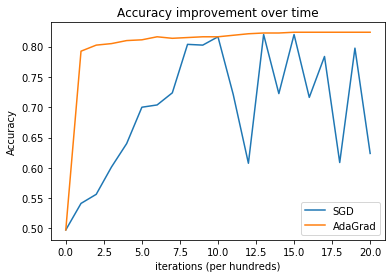

In [68]:

# Plot accuracy vs iteration for SGD and AdaGrad

plt.plot(acc_SGD, label='SGD')
plt.plot(acc_Ada, label='AdaGrad')
plt.ylabel('Accuracy')
plt.xlabel('iterations (per hundreds)')
plt.title('Accuracy improvement over time')
plt.legend(loc='lower right')
plt.show()

### Answer
From the plotted figure we might see that AdaGrad has better accuracy, because of the following reasons:
+ SGD uses the same learning rate for all the parameter updating.
+ SGD is more likely to converge to a local minimum.
+ AdaGrad uses a more suitable function for global optimization to regularize the gradient.